## 第4章 基礎的な回帰予測を行う10本ノック

### ノック31 : データを読み込もう

#### ボストンデータを読み込もう

In [49]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [50]:
print('説明変数')
print(f'{len(housing.data)}件')
print(housing.data[:5])

print('目的変数')
print(f'{len(housing.target)}件')
print(housing.target[:5])

print('変数名')
print(f'{len(housing.feature_names)}')
print(housing.feature_names)


説明変数
20640件
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
目的変数
20640件
[4.526 3.585 3.521 3.413 3.422]
変数名
8
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


#### データフレームに格納する

In [51]:
import pandas as pd

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### ノック32 : データの概要を把握しよう

#### 代表値の確認

In [52]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### ヒストグラムによるばらつきの確認

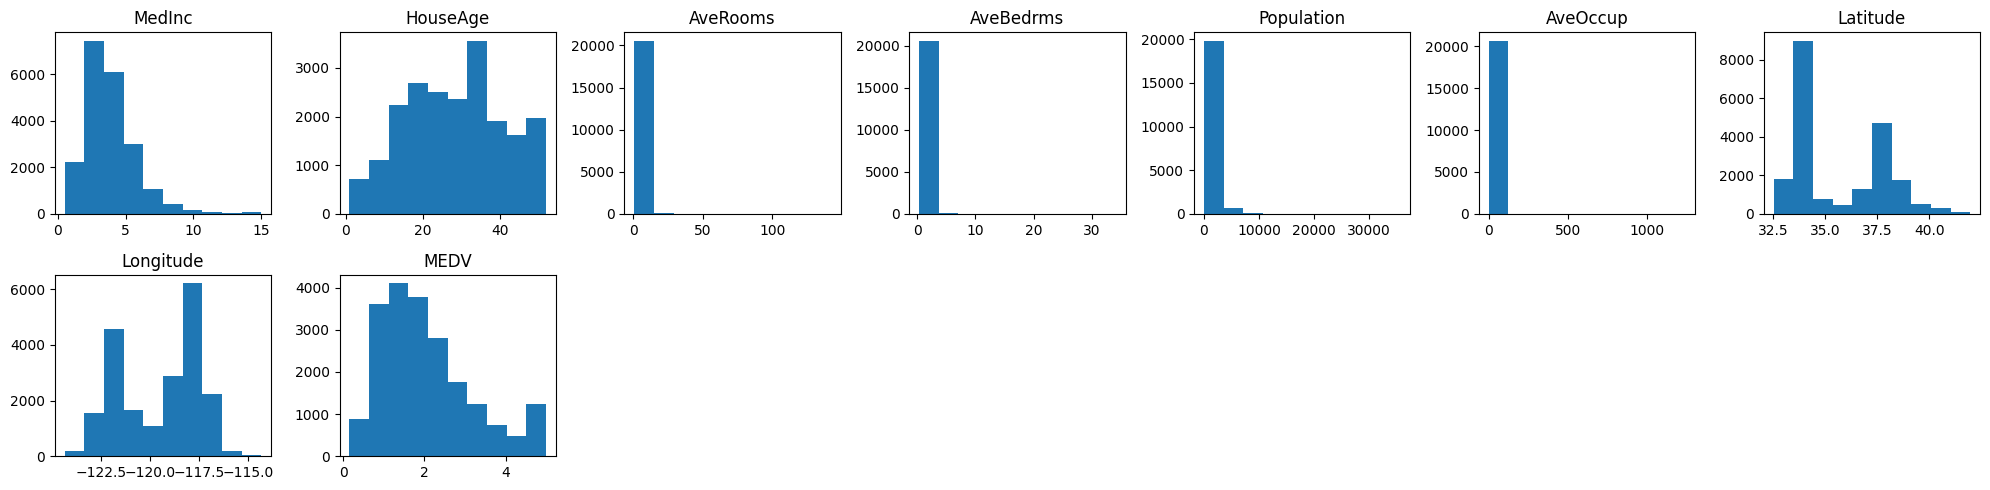

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i + 1)
    plt.hist(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### ノック33 : データ同士の相関を把握しよう

#### 相関関係の確認

In [54]:
df_corr = df.corr()
display(df_corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MEDV,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


#### 相関関係のヒートマップ
#### .. 年収が高いと、住んでいる家の価格も高いよねって相関が一番強い

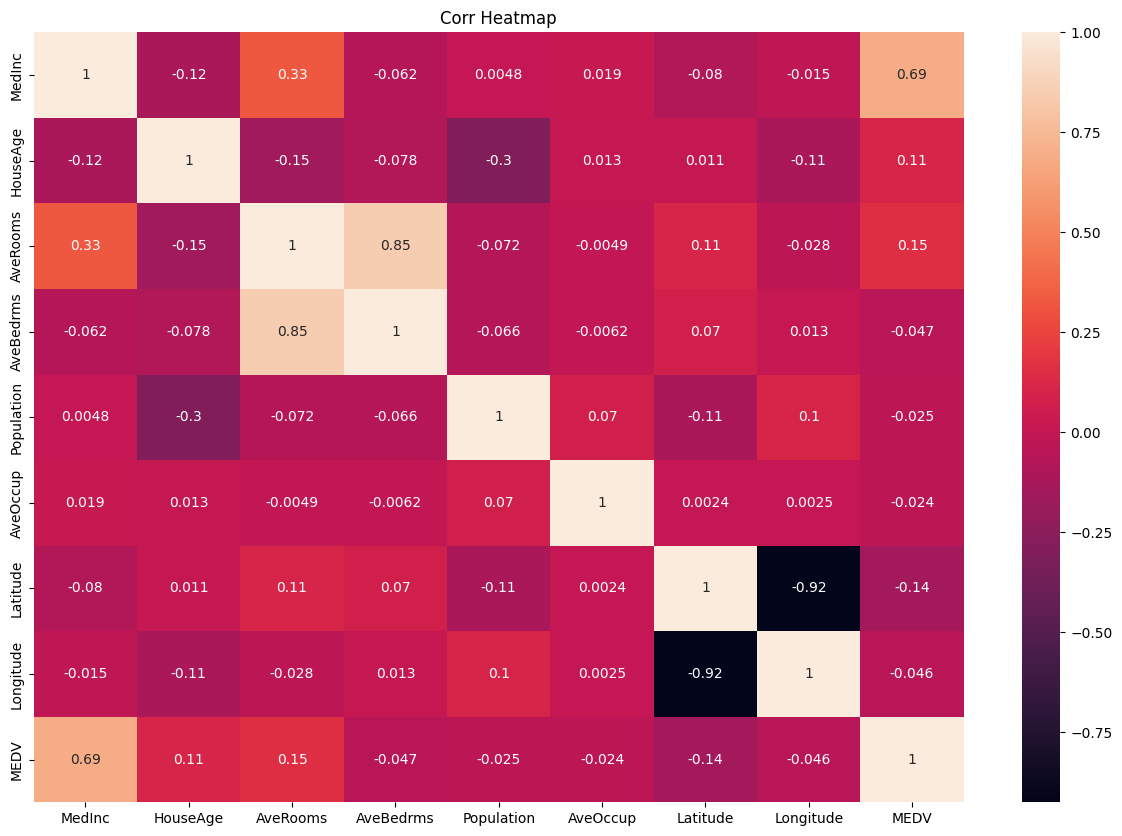

In [55]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)

plt.title("Corr Heatmap")
plt.show()

### ノック34 : データを分割しよう

#### 説明関数・目的変数の分割

In [56]:
X = df[["MedInc"]]
Y = df[["MEDV"]]

display(X.head())
display(Y.head())

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


#### 訓練データ・テストデータの分割

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

display(len(X_train))
display(X_train)

display(len(X_test))
display(X_test)

14448

,MedInc
1989,1.9750
256,2.2604
7887,6.2990
4581,1.7199
1993,2.2206
...,...
13123,4.4125
19648,2.9135
9845,3.1977
10799,5.6315


6192

,MedInc
14740,4.1518
10101,5.7796
20566,4.3487
2670,2.4511
15709,5.0049
...,...
19681,3.0962
12156,4.1386
10211,7.8750
2445,2.0658


### ノック35 : 単回帰モデルを構築しよう

#### 単回帰モデルの構築

In [58]:
from sklearn.linear_model import LinearRegression

simple_reg = LinearRegression().fit(X_train, Y_train)

### ノック36 : モデルを使って値を予測しよう

#### 学習データを使用した予測

In [59]:
y_train_pred = simple_reg.predict(X_train)

#### テストデータを使用した予測

In [60]:
y_test_pred = simple_reg.predict(X_test)

In [61]:
display(y_train_pred[:5])
display(y_test_pred[:5])

array([[1.26823324],
       [1.38893295],
       [3.09691423],
       [1.16034783],
       [1.37210097]])

array([[2.18883287],
       [2.8772526 ],
       [2.27210467],
       [1.46958269],
       [2.54962097]])

### ノック37 : 予測結果を可視化してみよう

#### 予測結果の可視化（訓練データ）

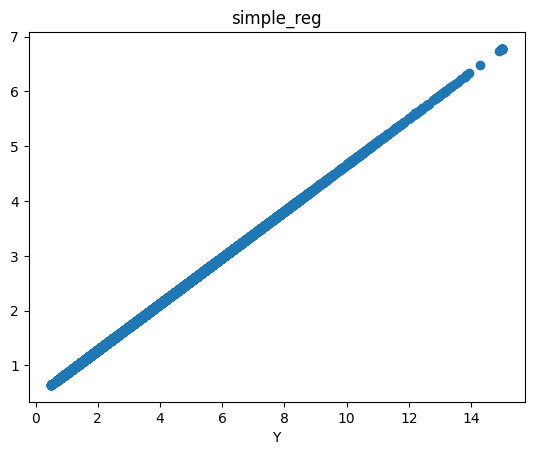

In [62]:
plt.scatter(X_train, y_train_pred)

plt.xlabel("X")
plt.xlabel("Y")

plt.title("simple_reg")
plt.show()

#### 予測結果の可視化（訓練データ・テストデータ）

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


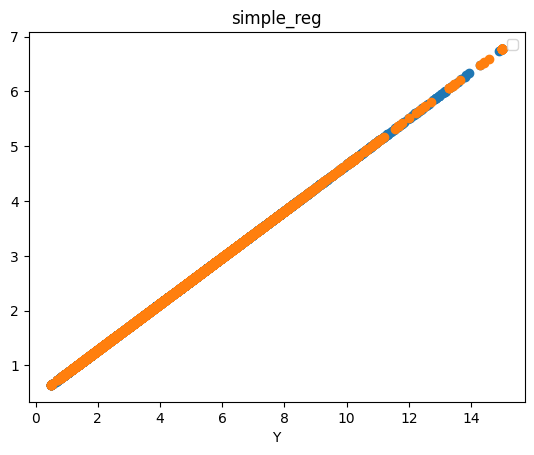

In [63]:
plt.scatter(X_train, y_train_pred)
plt.scatter(X_test, y_test_pred)

plt.xlabel("X")
plt.xlabel("Y")

plt.title("simple_reg")
plt.legend()
plt.show()

#### 傾きと切片の出力

In [64]:
display(f"a = {simple_reg.coef_[0][0]}")
display(f"b = {simple_reg.intercept_[0]}")

'a = 0.42291419843159217'

'b = 0.4329776980148201'

#### 予実のプロット

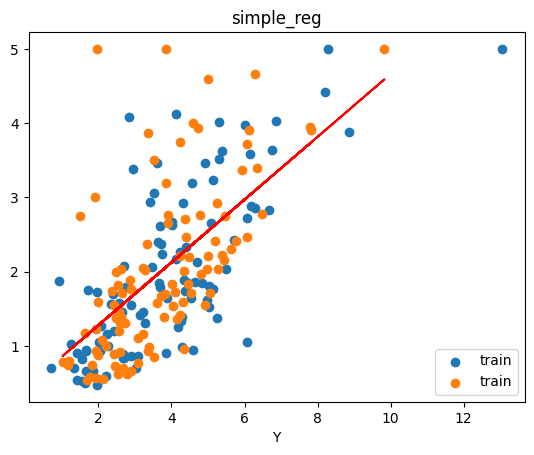

In [65]:
# 訓練データ
plt.scatter(X_train[:100], Y_train[:100], label="train")

# テストデータ
plt.scatter(X_test[:100], Y_test[:100], label="train")

# 線形モデル　結果
plt.plot(X_test[:100], y_test_pred[:100], color="red")

plt.xlabel("X")
plt.xlabel("Y")

plt.title("simple_reg")
plt.legend()
plt.show()

#### 残差プロット

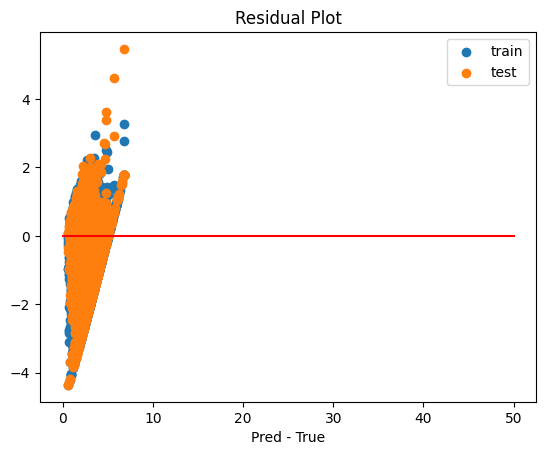

In [67]:
plt.scatter(y_train_pred, y_train_pred - Y_train, label="train")
plt.scatter(y_test_pred, y_test_pred - Y_test, label="test")

plt.plot([0, 50], [0, 0], color="red")

plt.xlabel("Pred")
plt.xlabel("Pred - True")

plt.title("Residual Plot")

plt.legend()
plt.show()

#### スコアの算出（テストデータ）

In [71]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np

mae = mean_absolute_error(Y_test, y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2score = r2_score(Y_test, y_test_pred)

display("テストデータ スコア")
display(f"MAE = {mae}")
display(f"MSE = {mse}")
display(f"RMSE = {rmse}")
display(f"R2 = {r2score}")

'テストデータ スコア'

'MAE = 0.6323928415375125'

'MSE = 0.7246186671507115'

'RMSE = 0.8512453624841145'

'R2 = 0.4564966485656322'

#### スコアの算出（訓練データ）

In [73]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np

mae = mean_absolute_error(Y_train, y_train_pred)
mse = mean_squared_error(Y_train, y_train_pred)
rmse = np.sqrt(mse)
r2score = r2_score(Y_train, y_train_pred)

display("テストデータ スコア")
display(f"MAE = {mae}")
display(f"MSE = {mse}")
display(f"RMSE = {rmse}")
display(f"R2 = {r2score}")

'テストデータ スコア'

'MAE = 0.6232350318210816'

'MSE = 0.6911954457712015'

'RMSE = 0.831381648685609'

'R2 = 0.48062719927664044'

### ノック39 : 構築したモデルを保存しよう

### ノック40 : 保存したモデルを利用しよう